In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
heart = pd.read_csv('C:\\programmer_shit\\data_salo_files\\stepic\\heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart.isnull().sum()
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
y = heart['target']
X = heart.drop(['target'] , axis = 1)
np.random.seed(0)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( 10, max_depth = 5)
rf.fit(X ,y)



RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot:>

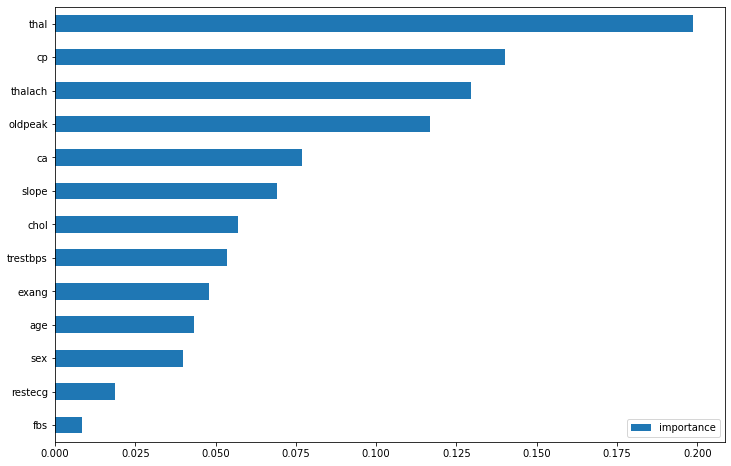

In [10]:
imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [4]:

training_mush = pd.read_csv('C:\\programmer_shit\\data_salo_files\\stepic\\training_mush.csv')
training_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [6]:
y = training_mush['class']
X = training_mush.drop(['class'] , axis = 1)
np.random.seed(0)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( random_state=0)
# n_estimators: от 10 до 50 с шагом 10
# max_depth: от 1 до 12 с шагом 2
# min_samples_leaf: от 1 до 7
# min_samples_split: от 2 до 9 с шагом 2
params = {'n_estimators' : range(10,50,10), 'max_depth': range(1,12,2),'min_samples_leaf': range(1,7), 'min_samples_split':range(2,9,2) }
tree_search = GridSearchCV(rf, params , cv = 3)
tree_search.fit(X,y)
best_tree = tree_search.best_estimator_

In [7]:
best_tree.min_samples_leaf

1

In [9]:

testing_mush = pd.read_csv('C:\\programmer_shit\\data_salo_files\\stepic\\testing_mush.csv')
testing_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,...,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,...,2,3,3,0,2,1,4,3,4,0


<AxesSubplot:>

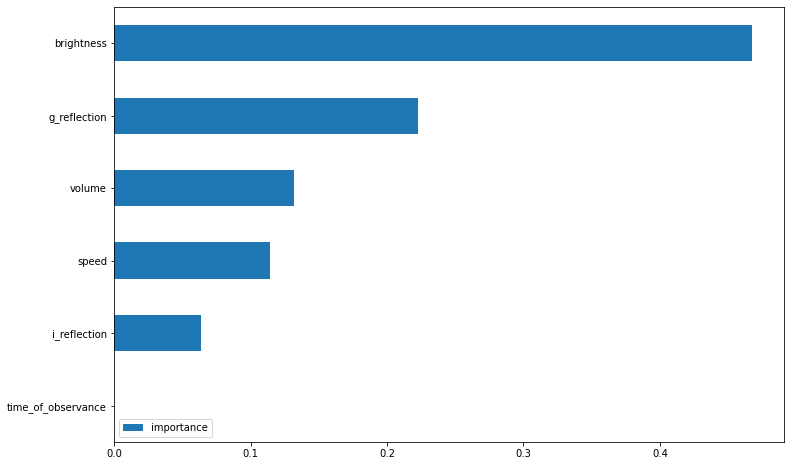

In [53]:
imp = pd.DataFrame(best_tree.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [45]:
pred
pred = pd.Series(best_tree.predict(testing_mush))

pd.Series(best_tree.predict(testing_mush)).value_counts()

0    1055
1     976
dtype: int64

In [18]:

testing_y_mush = pd.read_csv('C:\\programmer_shit\\data_salo_files\\stepic\\testing_y_mush.csv')
testing_y_mush


,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


In [24]:
c_matrix = confusion_matrix(testing_y_mush , pred )
c_matrix

array([[1055,    0],
       [   0,  976]], dtype=int64)

In [44]:
invasion = pd.read_csv('C:\\programmer_shit\\data_salo_files\\stepic\\invasion.csv')
y = invasion["class"]
X = invasion.drop('class' , axis = 1)
values = {'transport' :  0,  'fighter' :  1,  'cruiser' : 2}
y = invasion['class'].map(values)
y



0      0
1      0
2      0
3      1
4      1
      ..
495    1
496    0
497    1
498    1
499    0
Name: class, Length: 500, dtype: int64

In [50]:
y = invasion['class']
 = invasion.drop(['class'] , axis = 1)
np.random.seed(0)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
params = {'n_estimators' : range(10,50,10), 'max_depth': range(1,12,2),'min_samples_leaf': range(1,7), 'min_samples_split':range(2,9,2) }
tree_search = GridSearchCV(rf, params , cv = 3)
tree_search.fit(X,y)
best_tree = tree_search.best_estimator_



In [52]:


operative_information = pd.read_csv('C:\\programmer_shit\\data_salo_files\\stepic\\operative_information.csv')
operative_information
pred = pd.Series(best_tree.predict(operative_information))
pred.value_counts()

fighter      675
transport    594
cruiser      231
dtype: int64

In [54]:
X

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...
495,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [55]:
space_can_be_a_dangerous_place = pd.read_csv('C:\\programmer_shit\\data_salo_files\\stepic\\space_can_be_a_dangerous_place.csv')
space_can_be_a_dangerous_place



,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [56]:
space_can_be_a_dangerous_place.describe()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,172.575669,179.794570,22.779988,-0.000431,0.109990,0.929990,0.99035,0.902020
std,99.394833,103.914551,13.120118,0.997952,0.312879,0.255165,0.09776,0.297289
min,0.000000,0.000000,0.000000,-4.418405,0.000000,0.000000,0.00000,0.000000
25%,86.775000,90.000000,11.454300,-0.677894,0.000000,1.000000,1.00000,1.000000
50%,172.600000,180.000000,22.783200,-0.001029,0.000000,1.000000,1.00000,1.000000
75%,258.500000,270.000000,34.122000,0.673115,0.000000,1.000000,1.00000,1.000000
max,344.900000,359.000000,45.526800,4.205237,1.000000,1.000000,1.00000,1.000000


In [59]:
data = pd.read_csv('C:\programmer_shit\data_salo_files\stepic\submissions_data_train.csv')
data[data.submission_status == "wrong"].groupby(['user_id', 'step_id'], as_index=False).agg({'timestamp':'max'}).step_id.value_counts().keys()[0]

31978